In [3]:
#Part A Downloading and observing the data
import pandas as pd

url = "https://raw.githubusercontent.com/TrevorMattSmith/Math-156-HW2-Q4/main/data/winequality-red.csv" #url connected to dataset in my github repo
data = pd.read_csv(url, sep=';') #pandas package allows us to parse the data

data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Part B Splitting the data
from sklearn.model_selection import train_test_split #using this feature to split the data

X = data.drop(columns=["quality"]) #drop quality from the predictors, since we are predicting quality
y= data['quality'] #make y the predicted variable

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=35, test_size=0.2)

In [5]:
#Part C Write a program using the closed-form solution for training a simple linear regression model with sum-of-squares error function
import numpy as np

# We will add a dummy variable to the X train and test data because we need a vaiable to be "active" when all other xs are 0
#This will allow us to see the "intercept"

# Add column of 1s to X_train
#hstack will stack coulumns next to eachother
#np.ones will create 1 column with X_train.shape[0] number of rows
X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

# Same for test set
X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))


#The next step we need to reshape the y data, right now it is a 1d panda series but it needs to be a vector for us to perform our computation
y_train_col = y_train.values.reshape(-1, 1) #reshapes to 1 column fitted to number of observations in set
y_test_col = y_test.values.reshape(-1, 1)

#With the data properly formatted we are now able to create the model
# @ is matrix multiplication
# .T is the transpose
#np.linalg.inv creates the inverse of the function
w_closed = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train_col



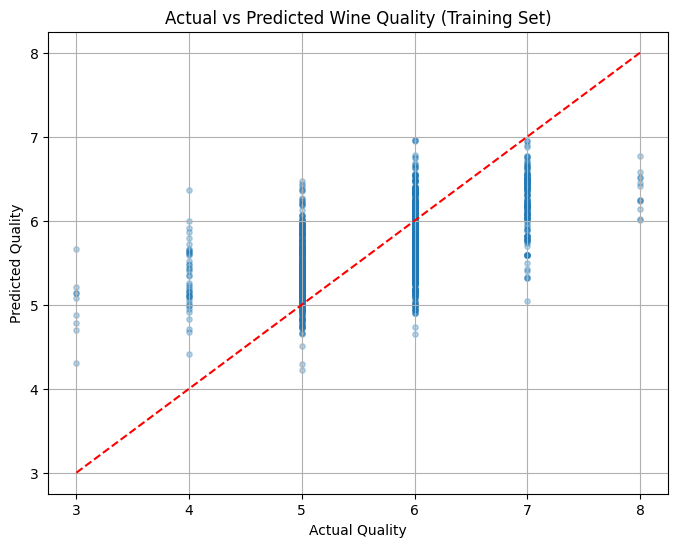

In [13]:
#Part D: Create a graph of the actual vs predicted
import matplotlib.pyplot as plt

# Step 1: Predict on training set using w_closed
y_pred_train = X_train_bias @ w_closed  # matrix multiplication of the training data times the fitted wieghts

# Step 2: Plot predicted vs actual
plt.figure(figsize=(8, 6)) #creates the intial figure for the graph
plt.scatter(y_train_col, y_pred_train, alpha=0.3, s=15)  #creates scatter plot with slightly transulcent smaller dots
plt.xlabel("Actual Quality") #Labels x axis
plt.ylabel("Predicted Quality") #Labels y axis
plt.title("Actual vs Predicted Wine Quality (Training Set)") #Labels the graph
plt.plot([y_train_col.min(), y_train_col.max()],
         [y_train_col.min(), y_train_col.max()], 'r--')  # creates a line for "perfect predictions"
plt.grid(True) #displays the gridlines
plt.show() #shows the graph

#The way to read this plot is by observing how close the predicted value is to the actual value
# if it is a perfect prediction it should lie on the line x=y otherwise there will be some residual value
#this residual is seen by how far the plotted (predicted vs actual) point is from the line x=y





In [8]:
#E reporting the root-mean-square on training and test sets

#First write a function to calculate RSME
def RMSE(y_true, y_predicted):
  return np.sqrt(np.mean((y_predicted - y_true)**2))

#Create predictions on the test set
y_test_pred = X_test_bias @ w_closed

# Calculate RMSE for training set
train_rmse = RMSE(y_train_col, y_pred_train)

test_rsme = RMSE(y_test_col, y_test_pred)

print("RMSE on Training Set:", train_rmse)
print("RMSE on Test Set:", test_rsme)


RMSE on Training Set: 0.6377718797091144
RMSE on Test Set: 0.679234831689023
